作業二
===
本次選擇的競賽為House Prices - Advanced Regression Techniques，  
提供的測試資料有高達81行數據，扣除最終只要求輸出ID[1461~2919]與saleprice還有79行的數據。  
我會先將資料導入後觀察哪些資料較有利於判斷並使用課程中的模型嘗試進行作答。


In [ ]:
#引入使用的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#導入訓練資料
df = pd.read_csv("train.csv")
print(type(df))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


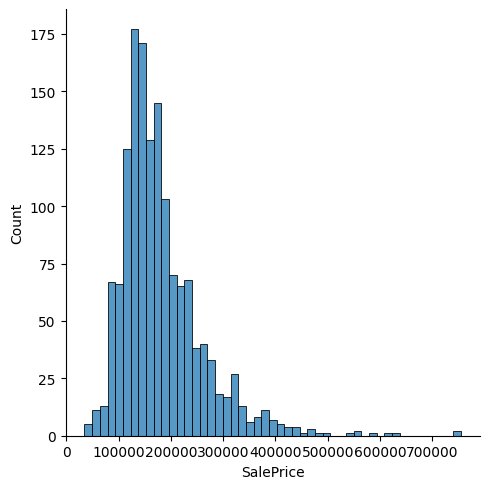

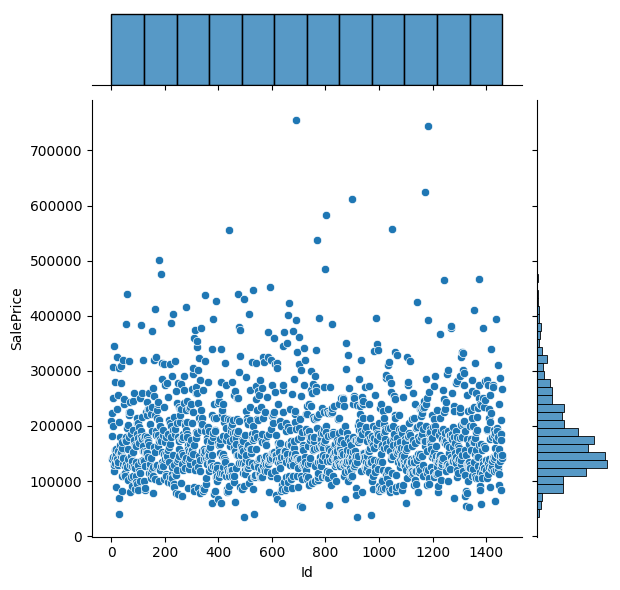

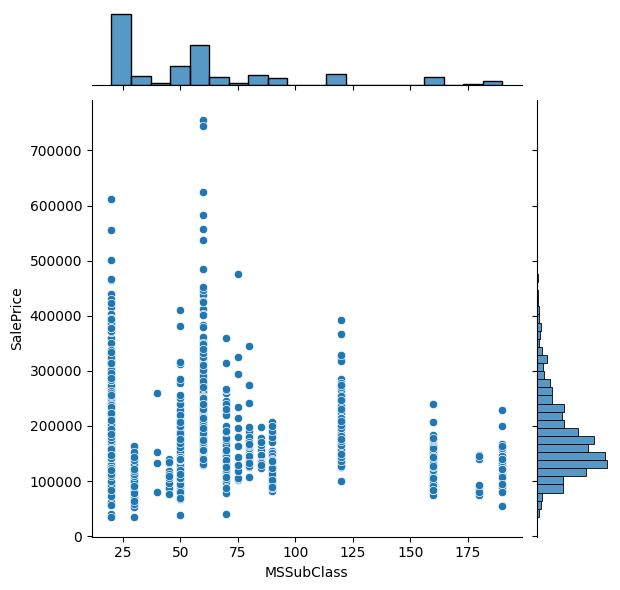

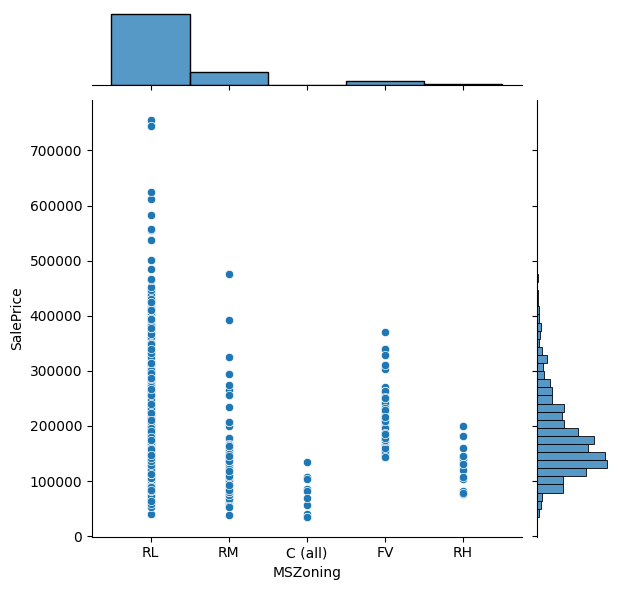

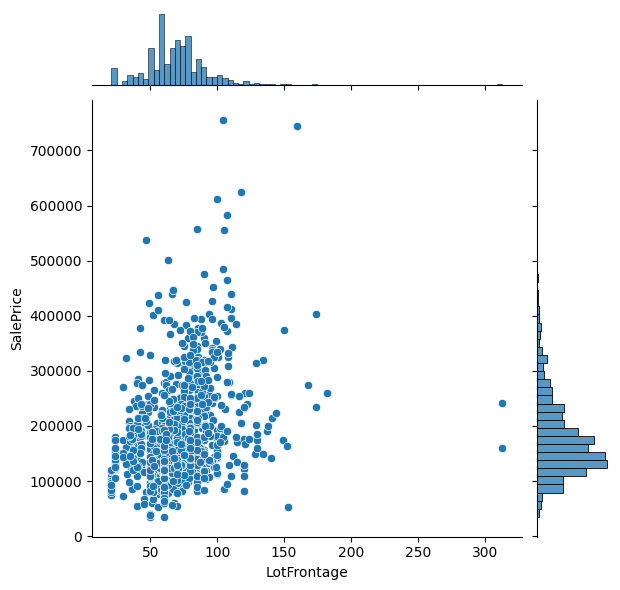

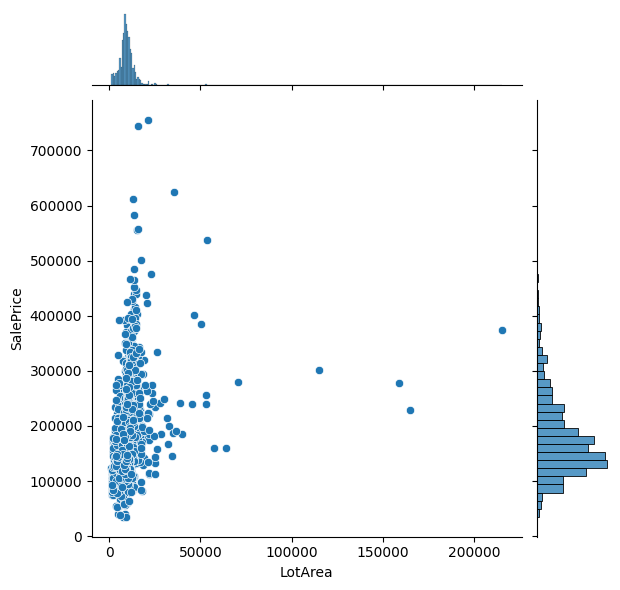

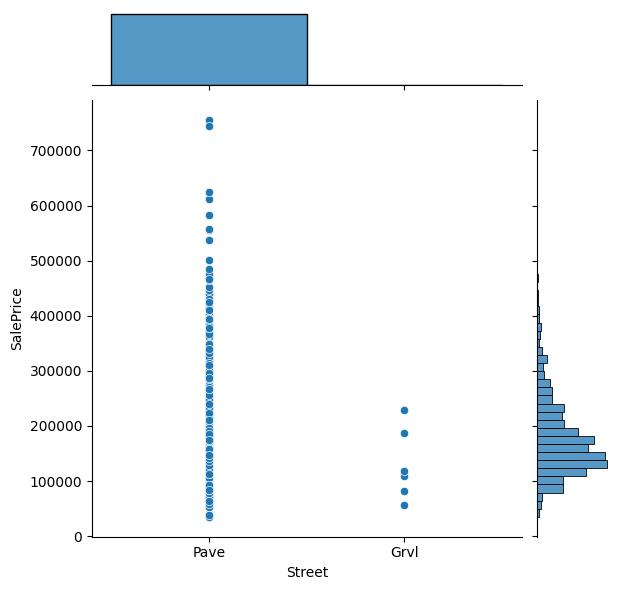

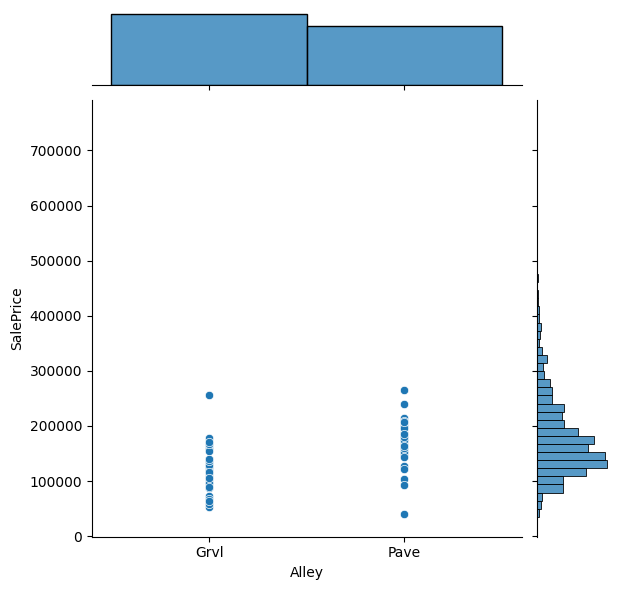

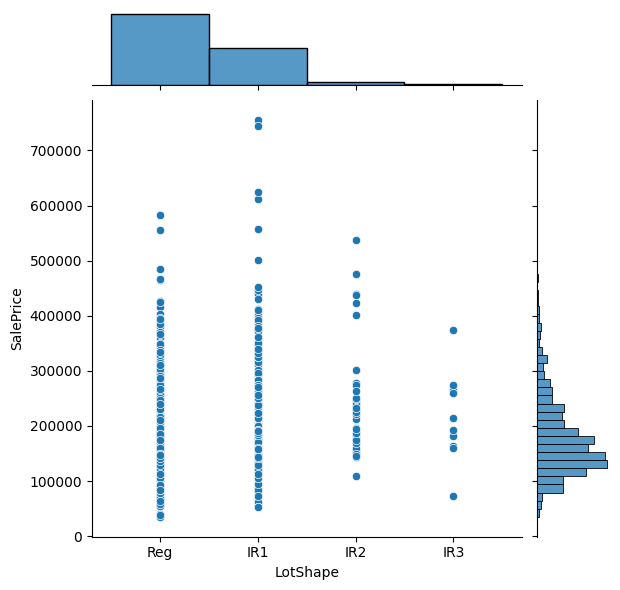

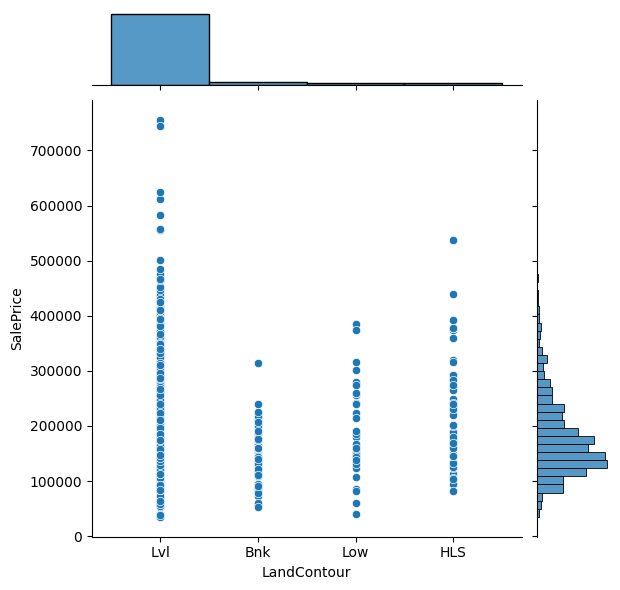

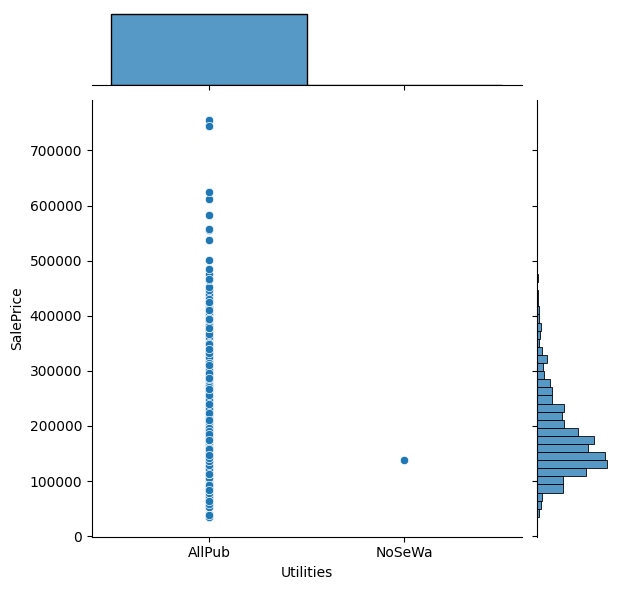

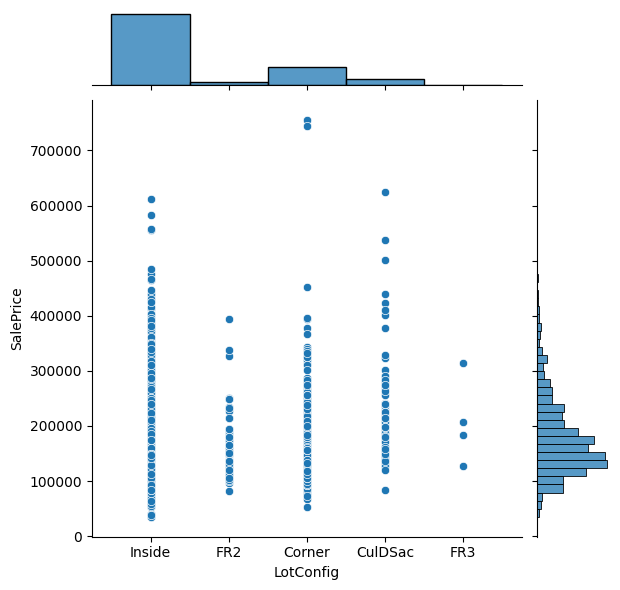

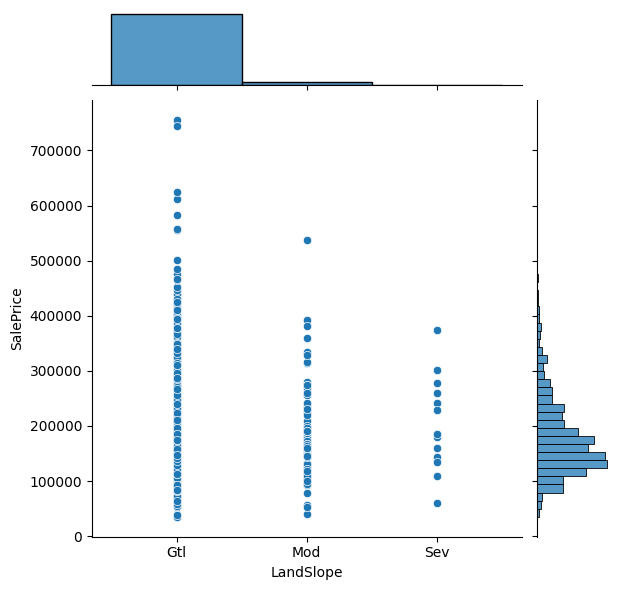

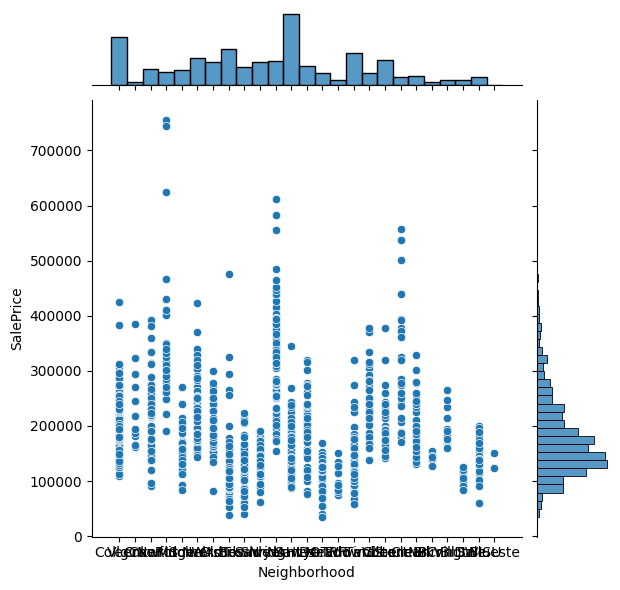

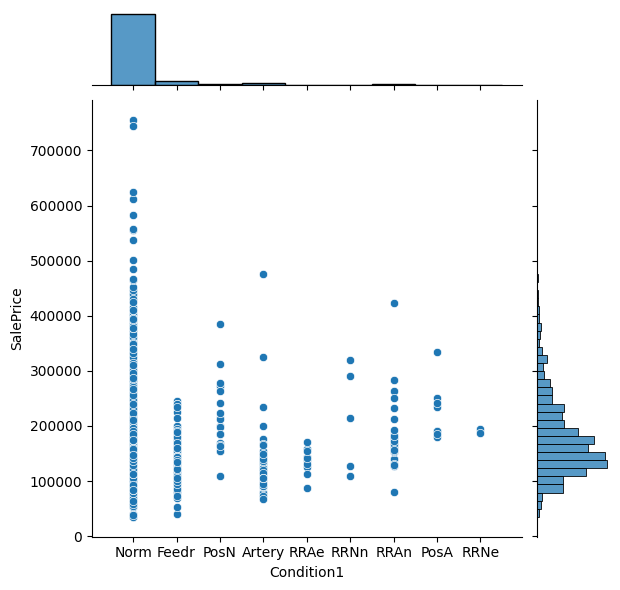

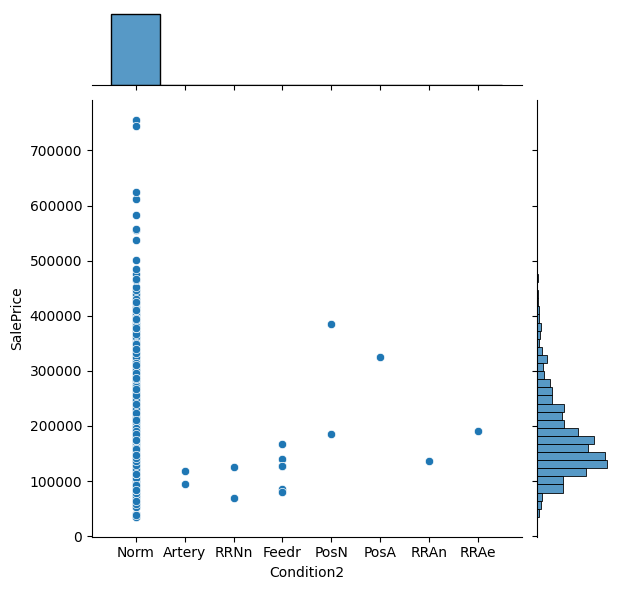

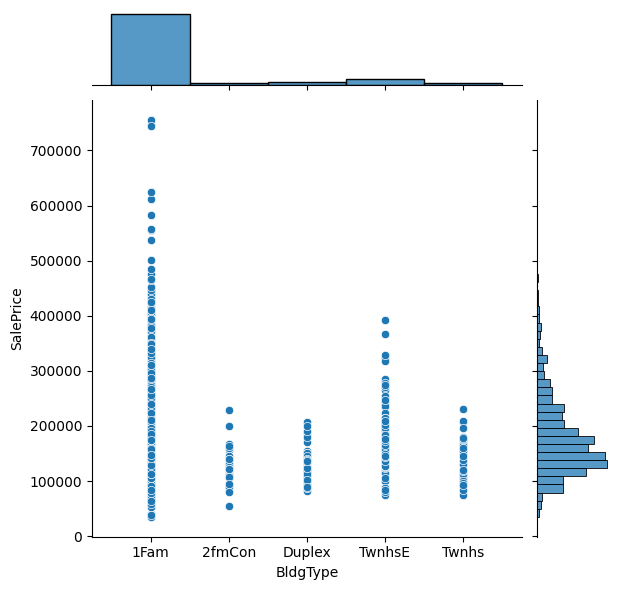

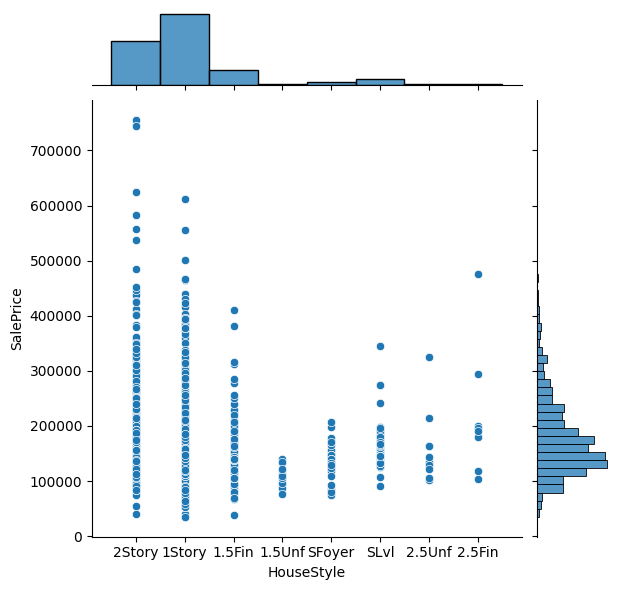

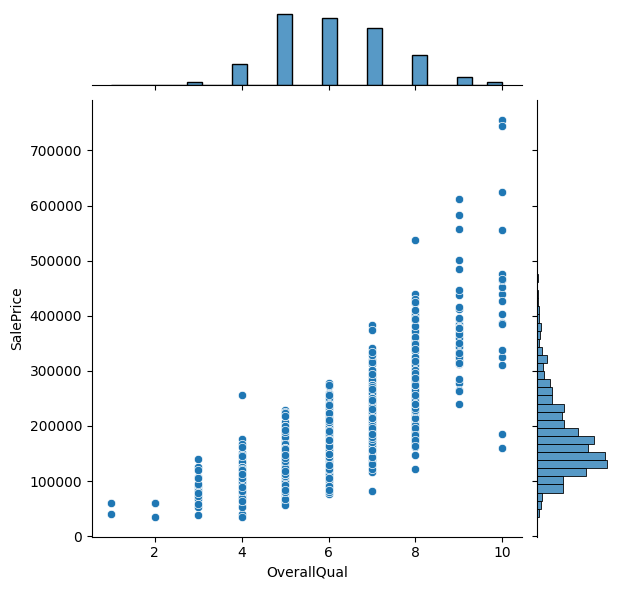

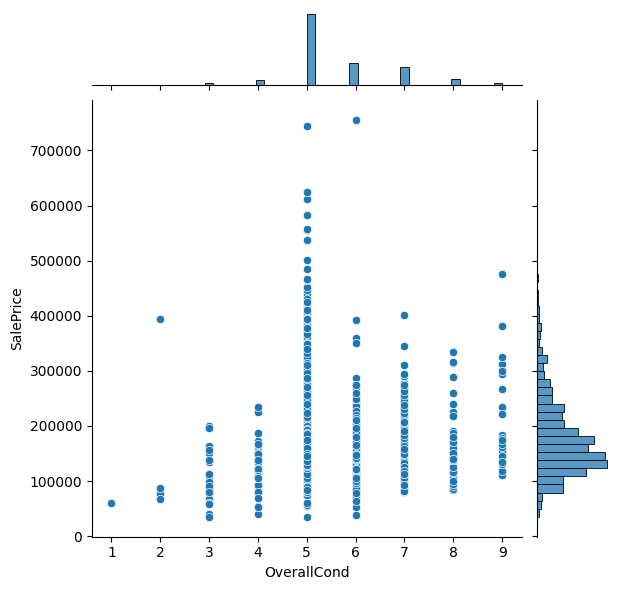

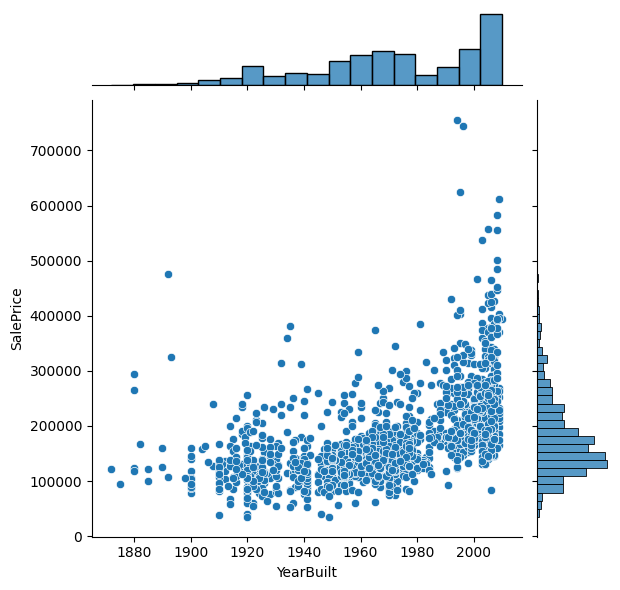

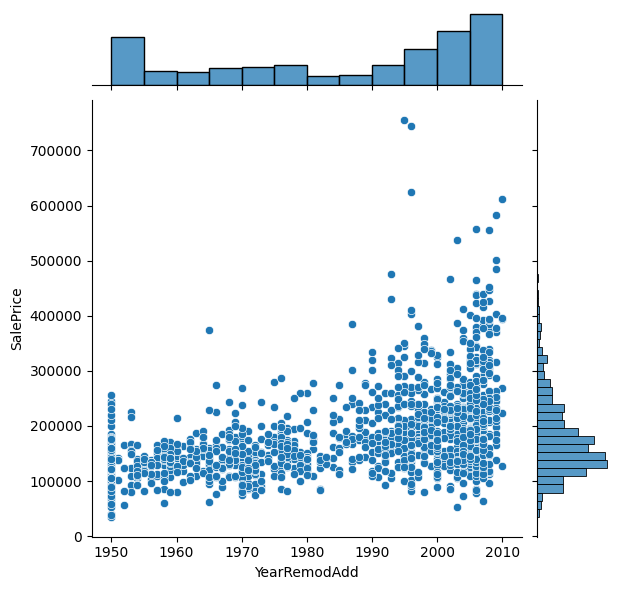

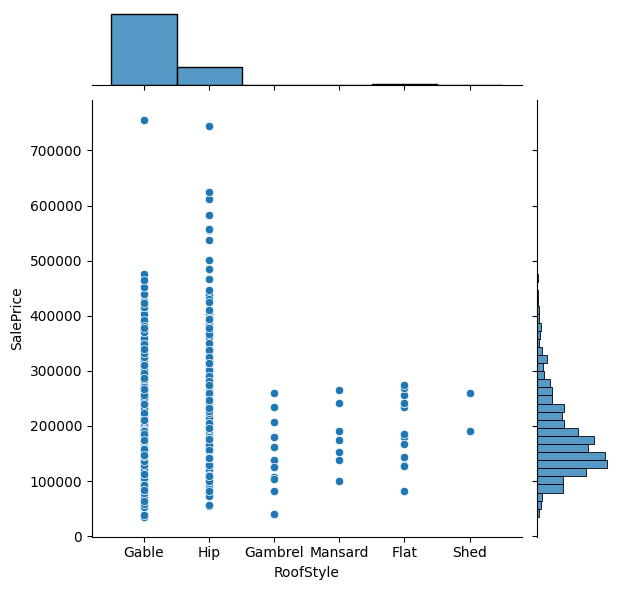

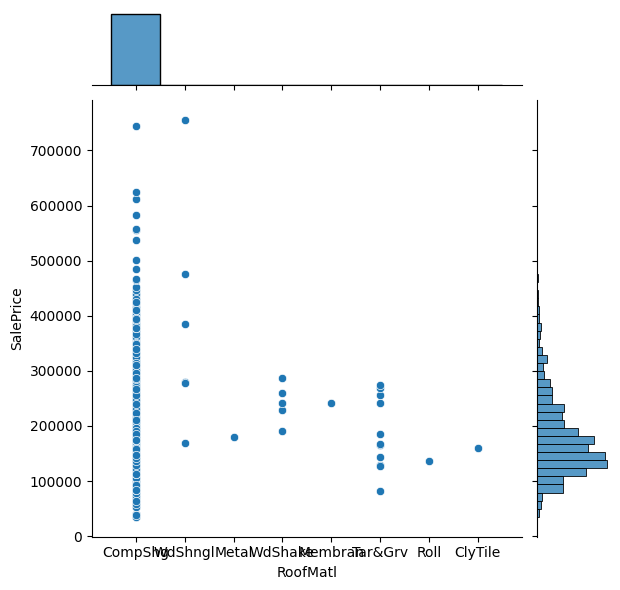

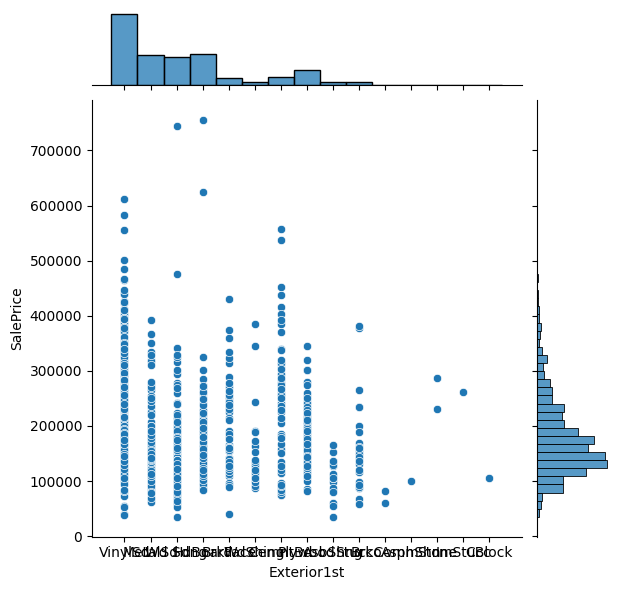

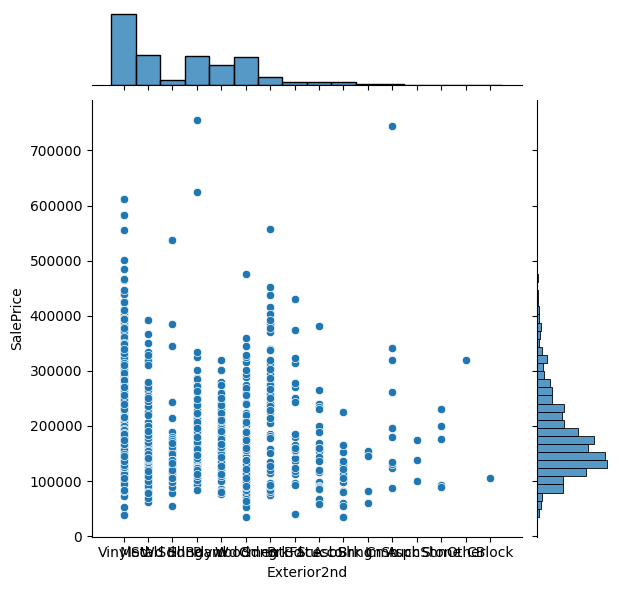

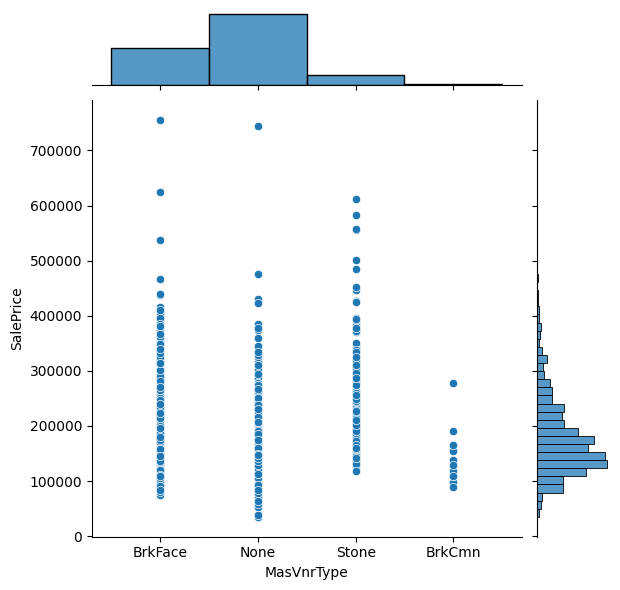

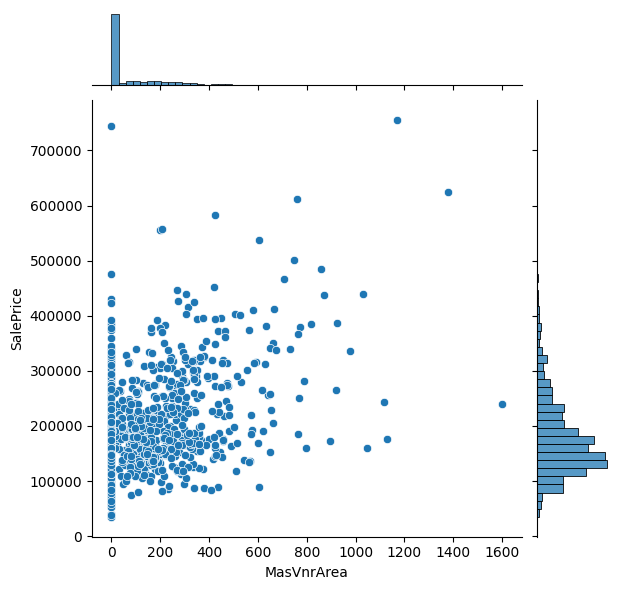

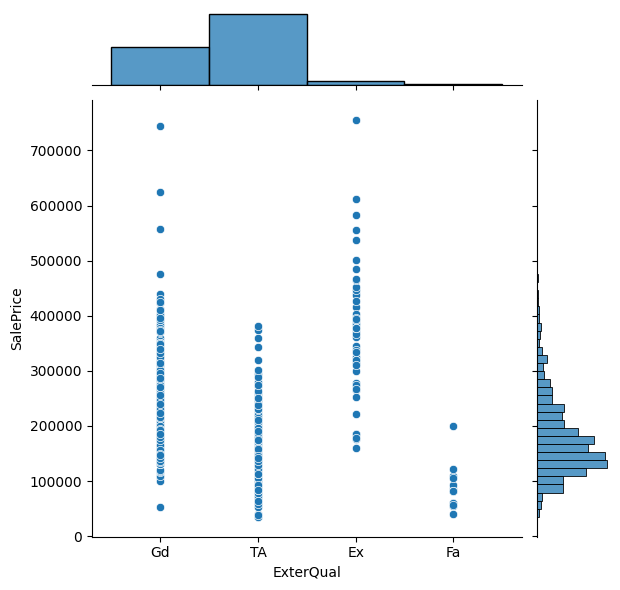

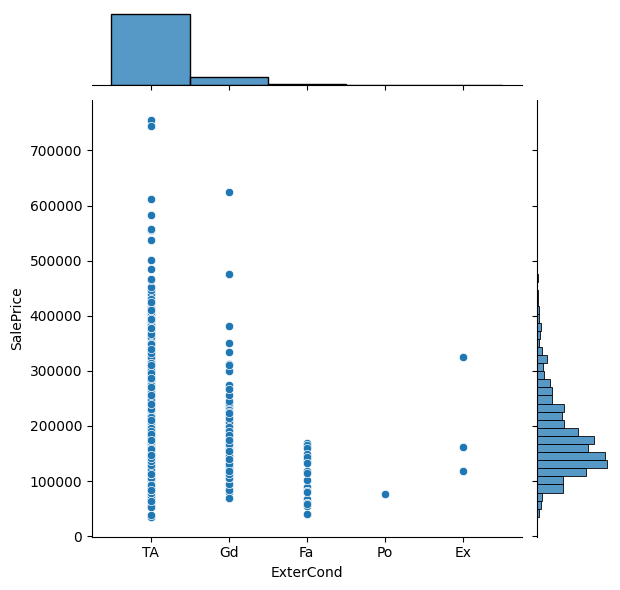

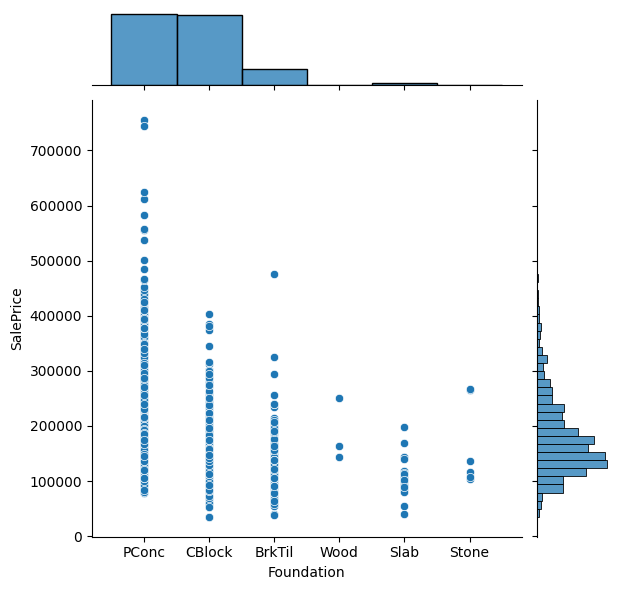

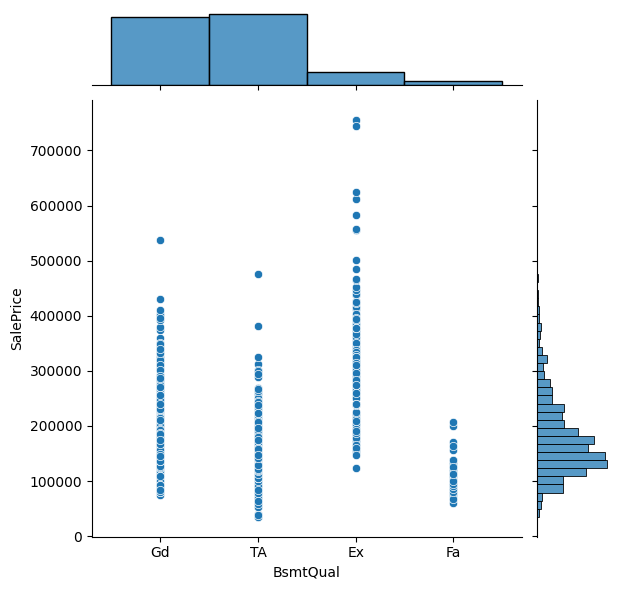

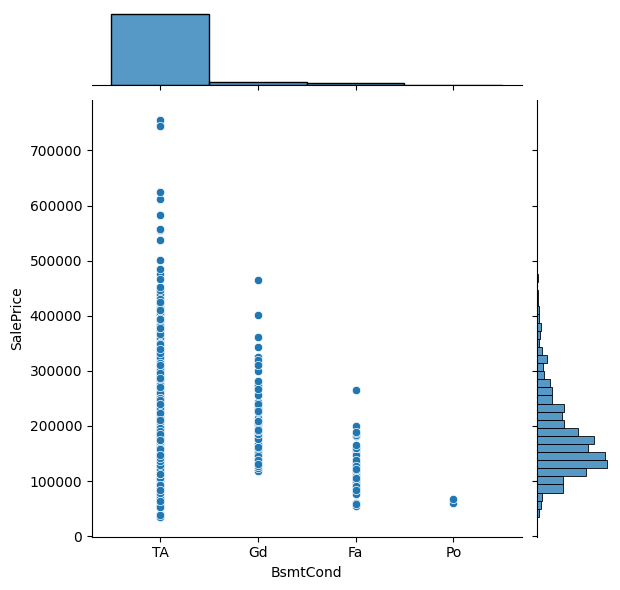

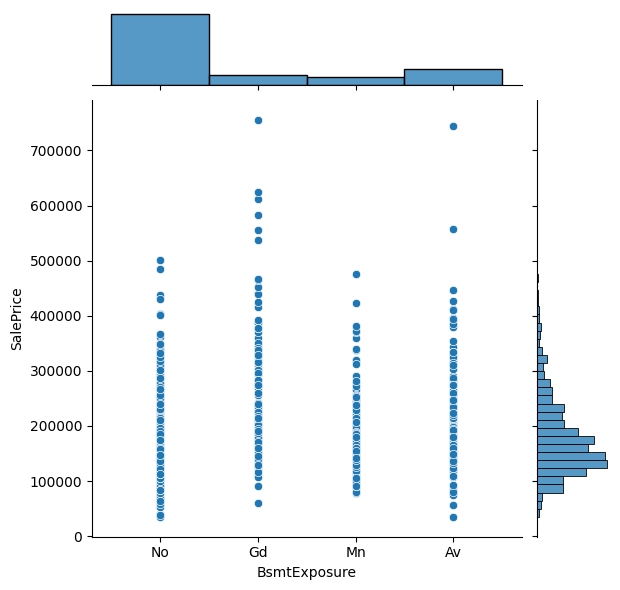

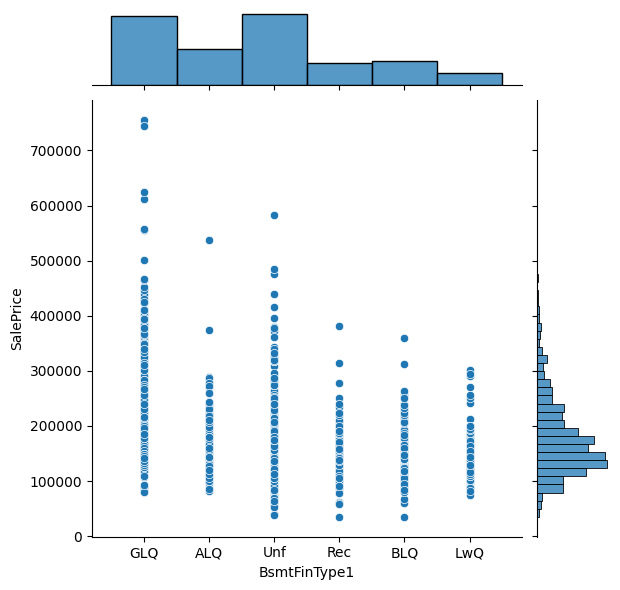

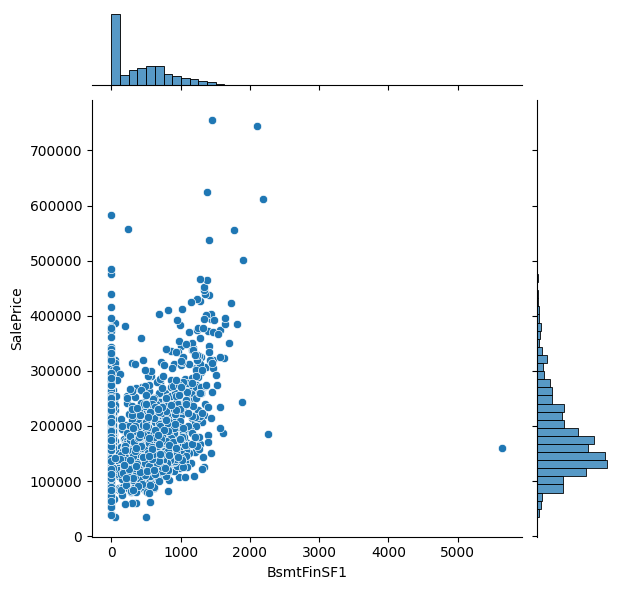

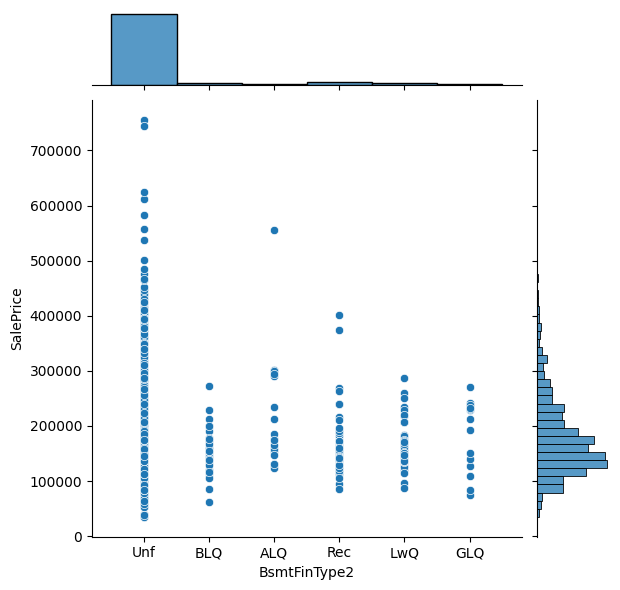

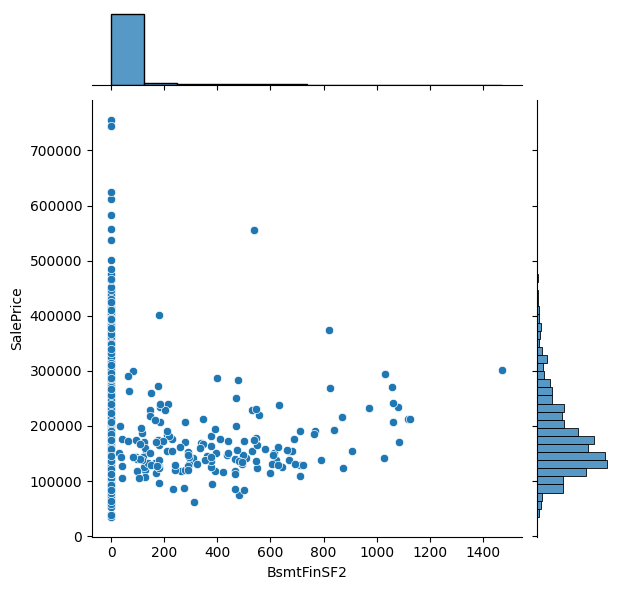

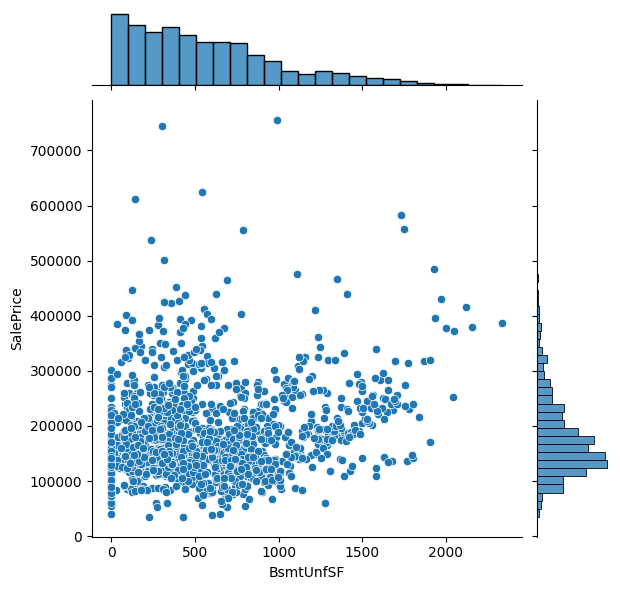

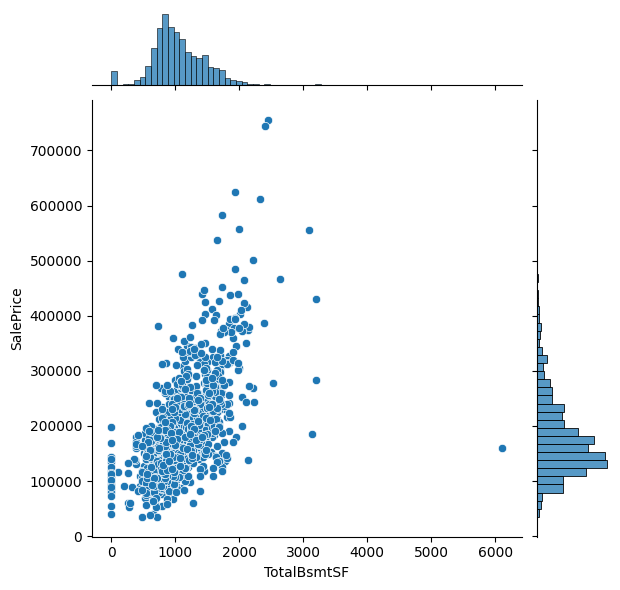

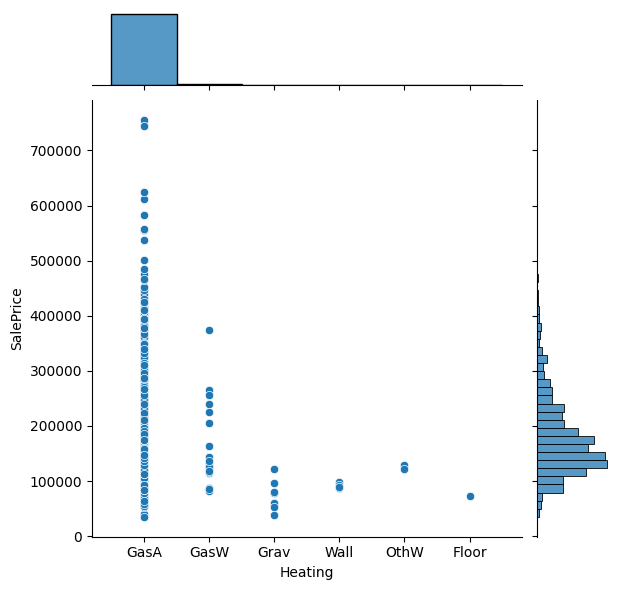

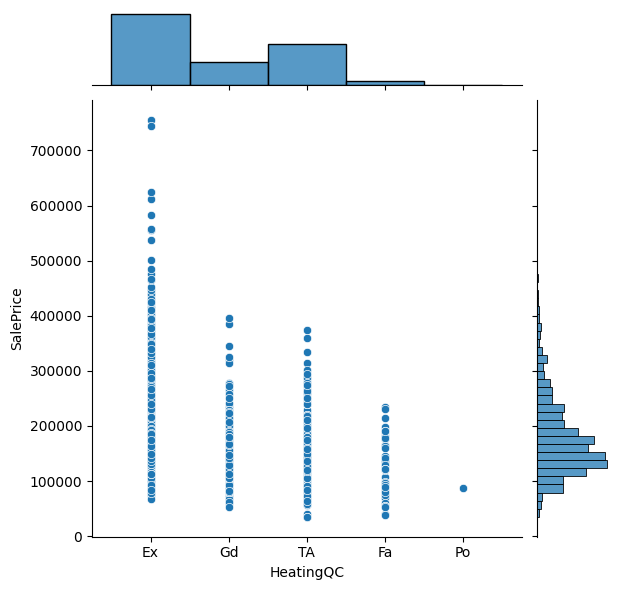

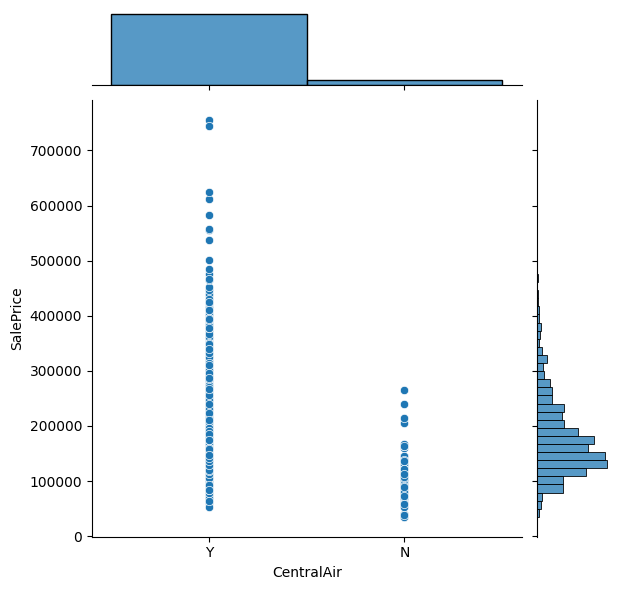

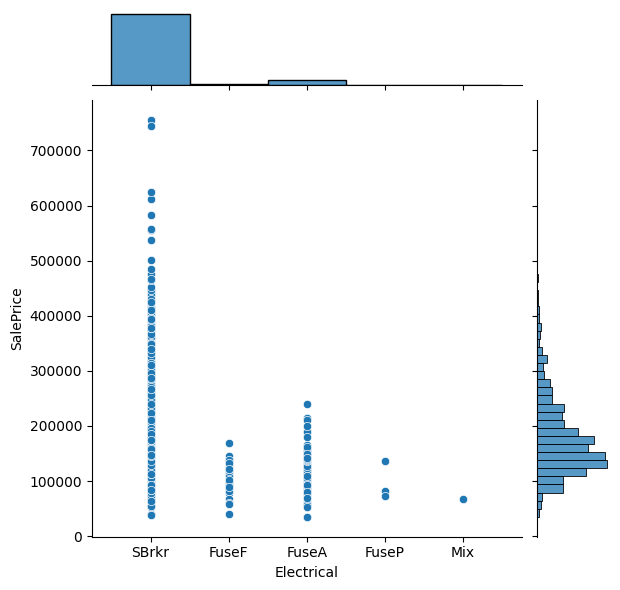

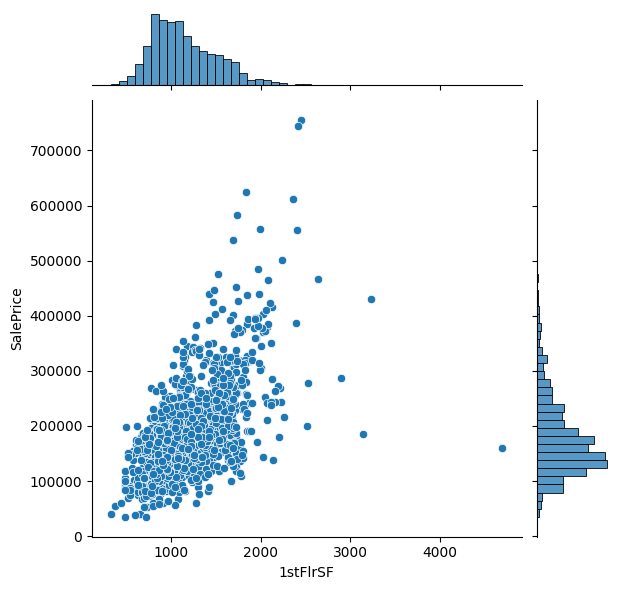

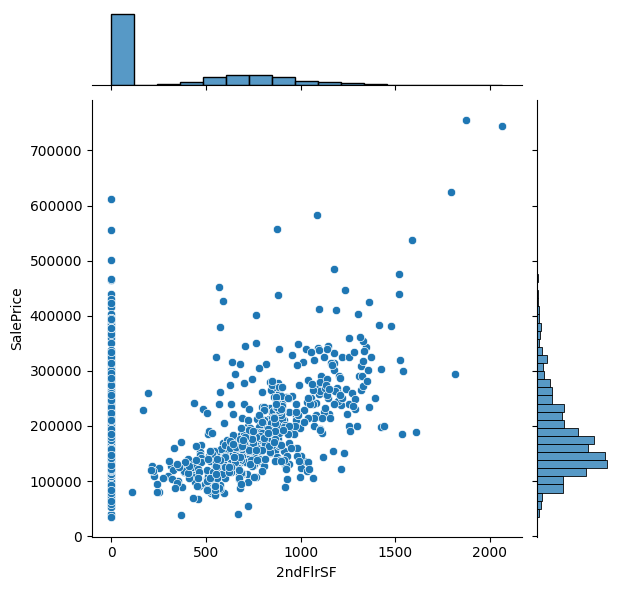

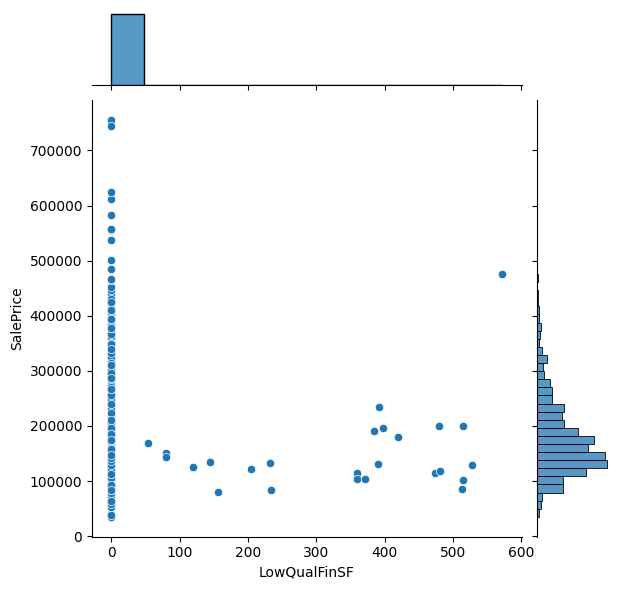

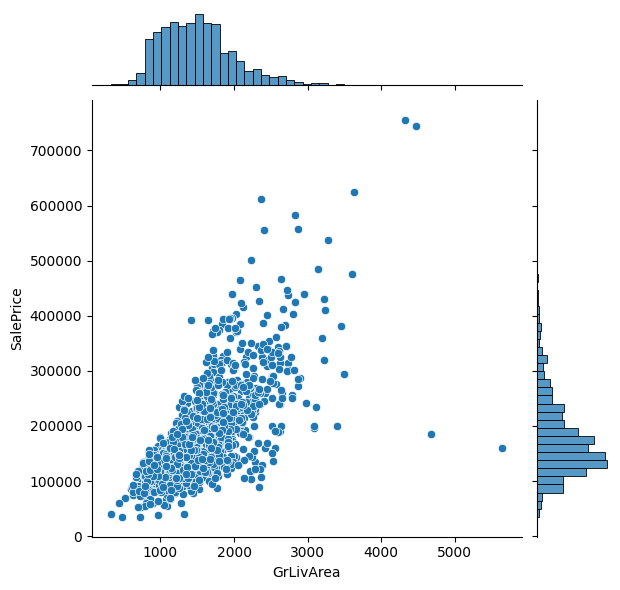

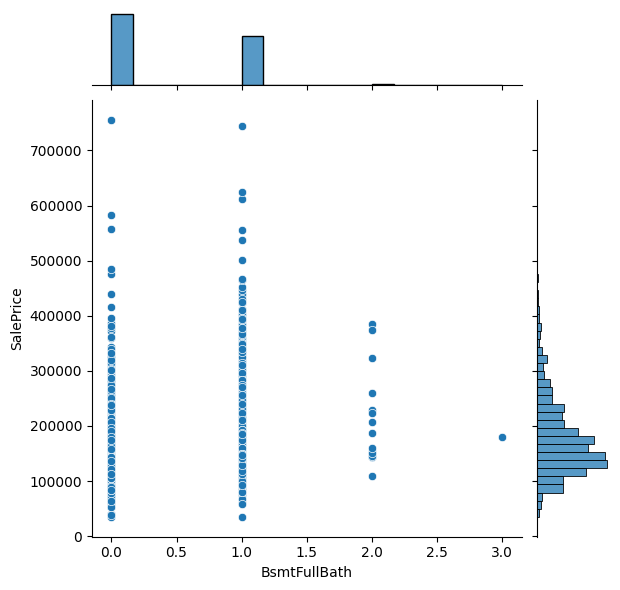

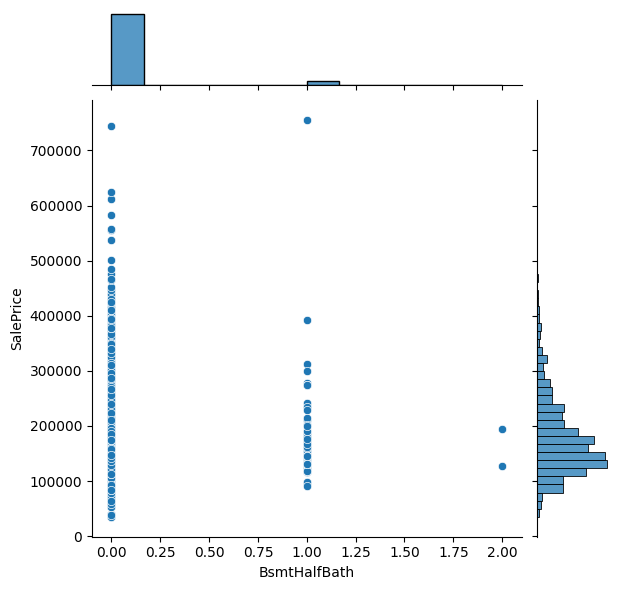

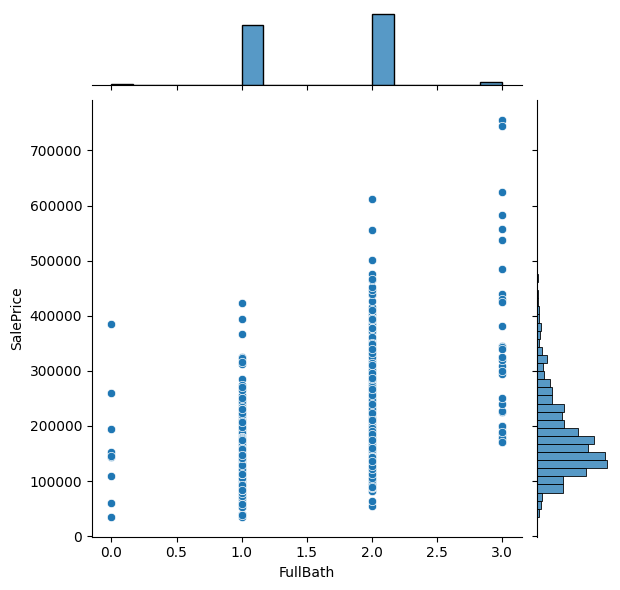

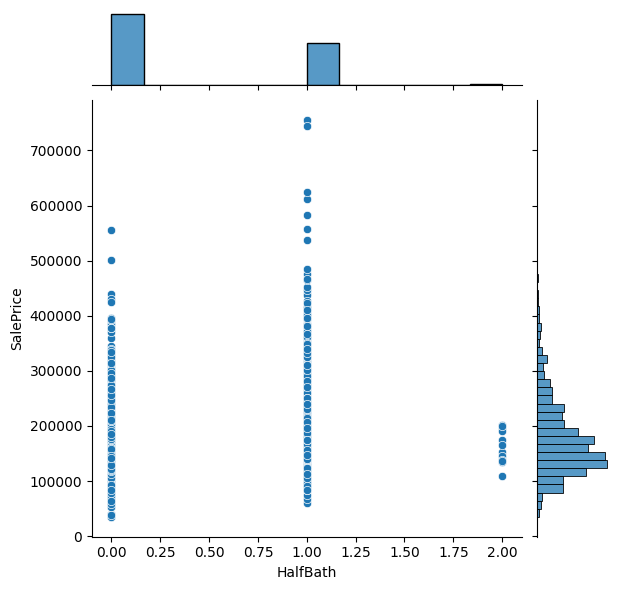

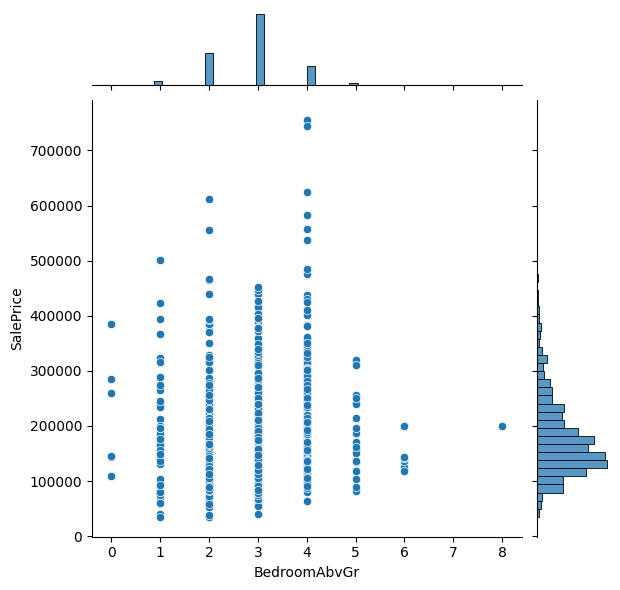

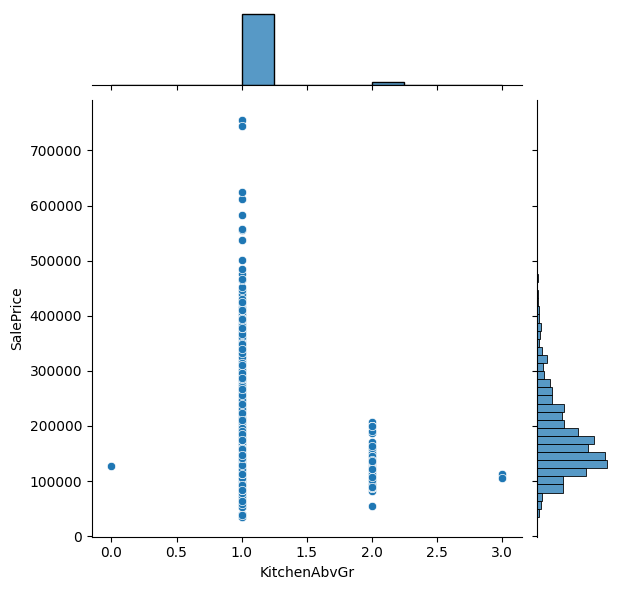

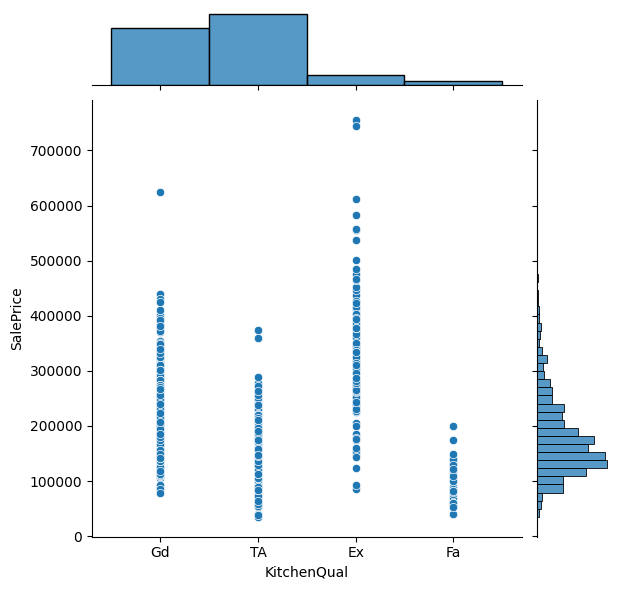

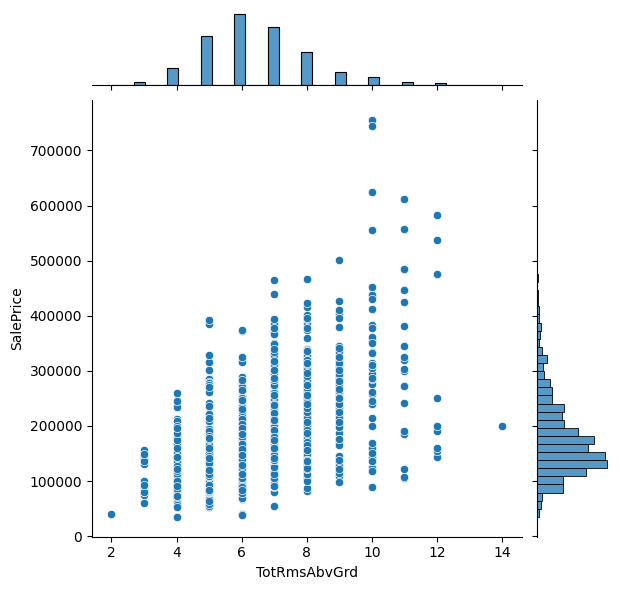

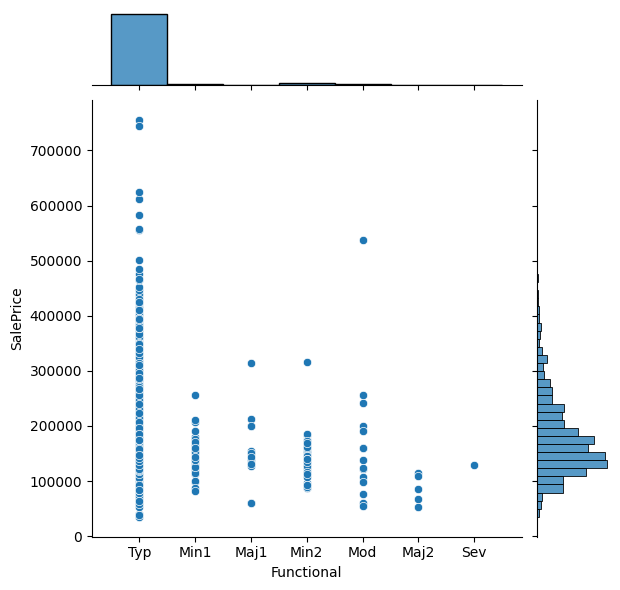

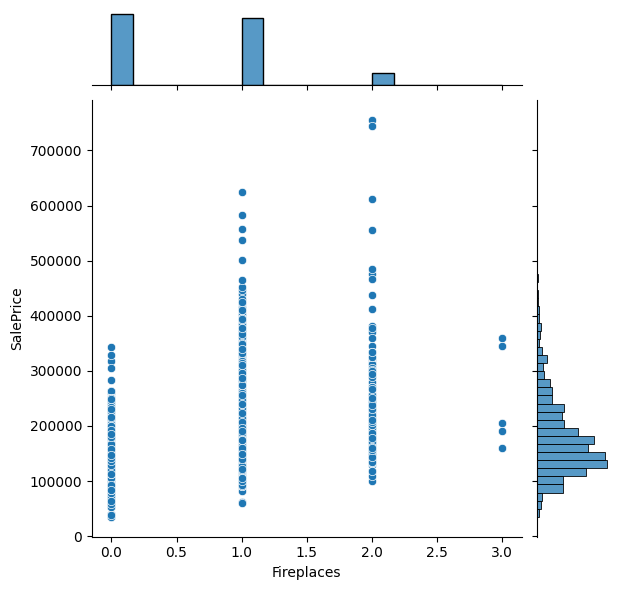

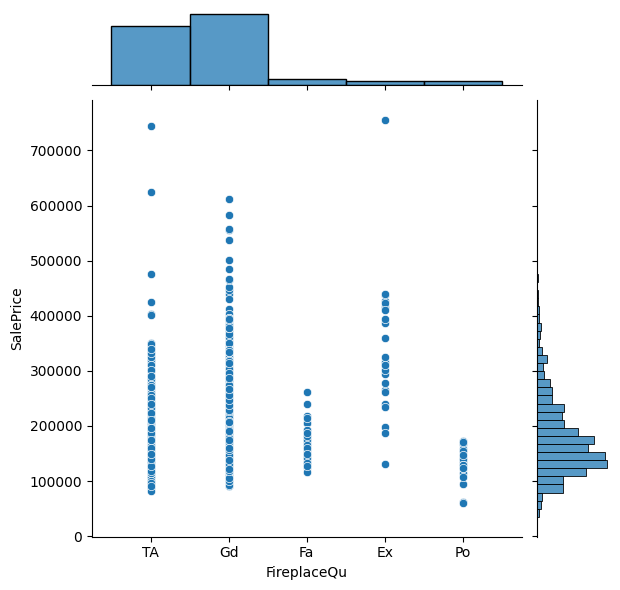

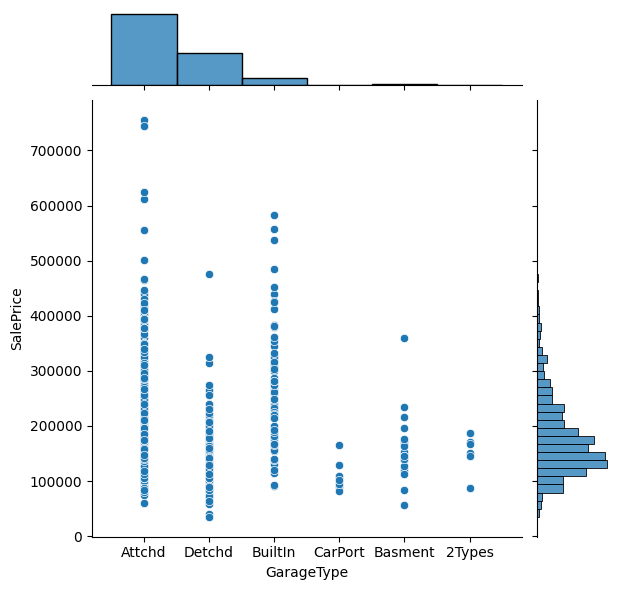

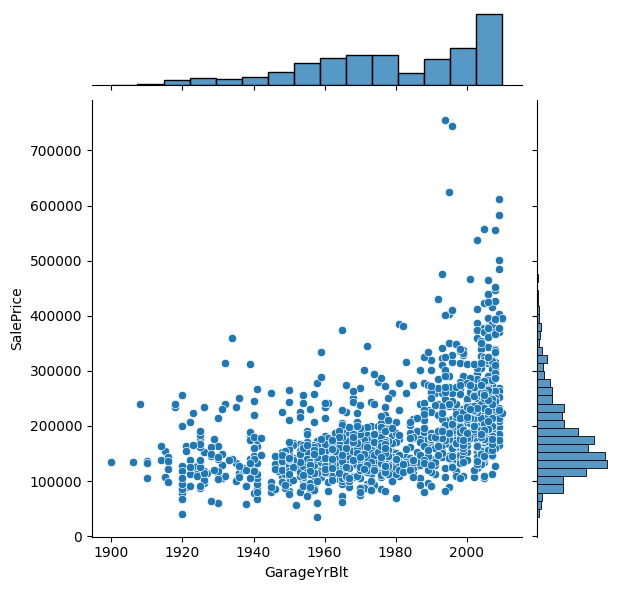

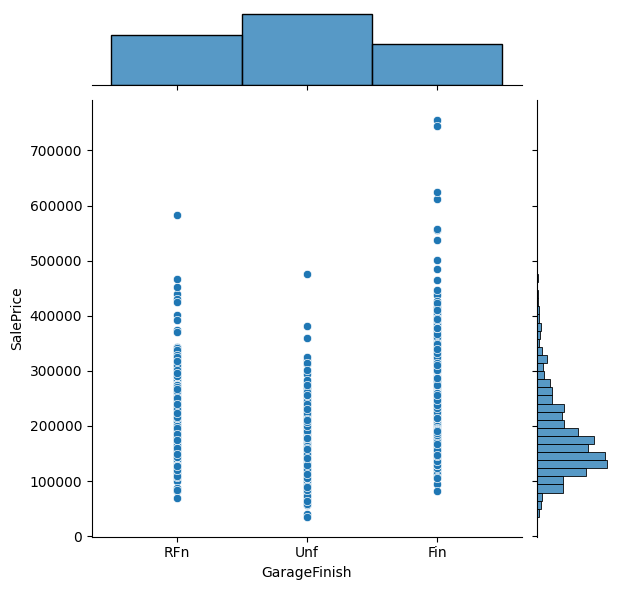

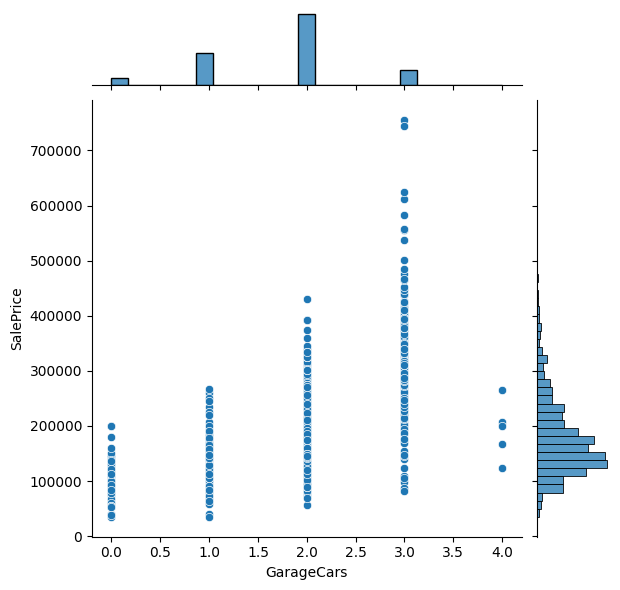

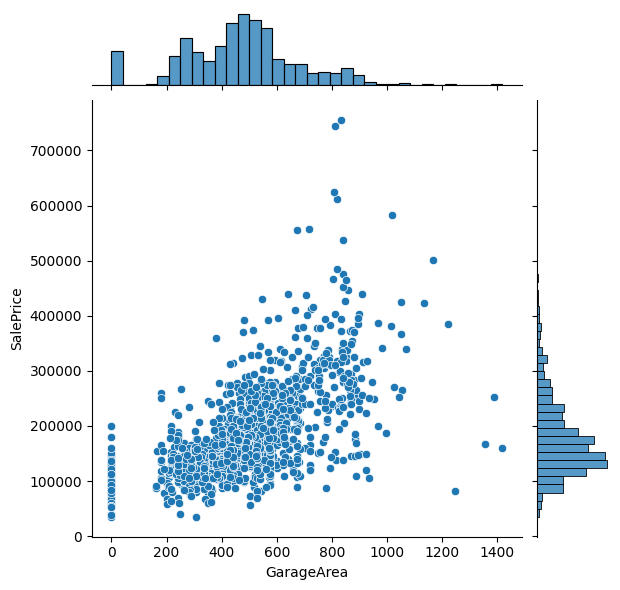

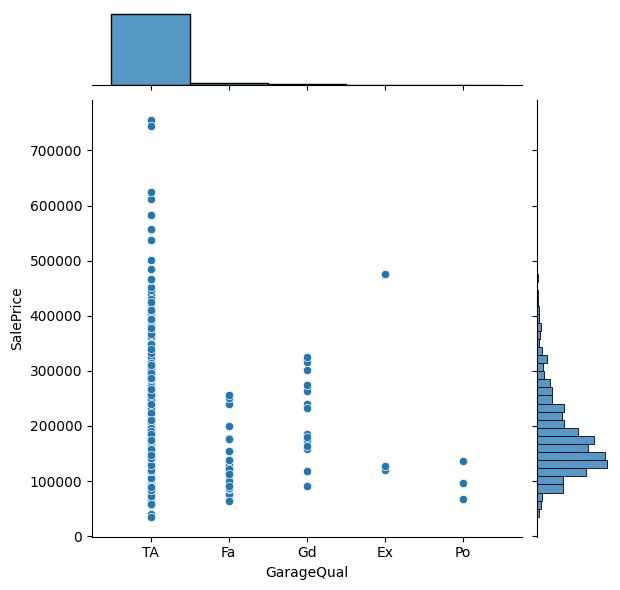

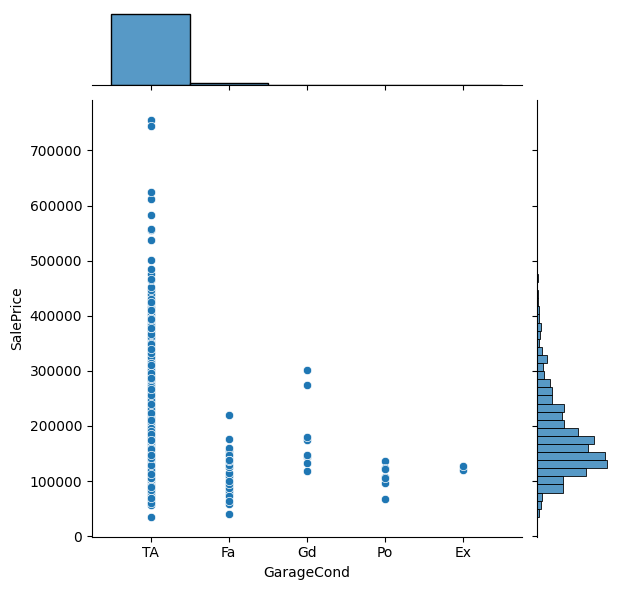

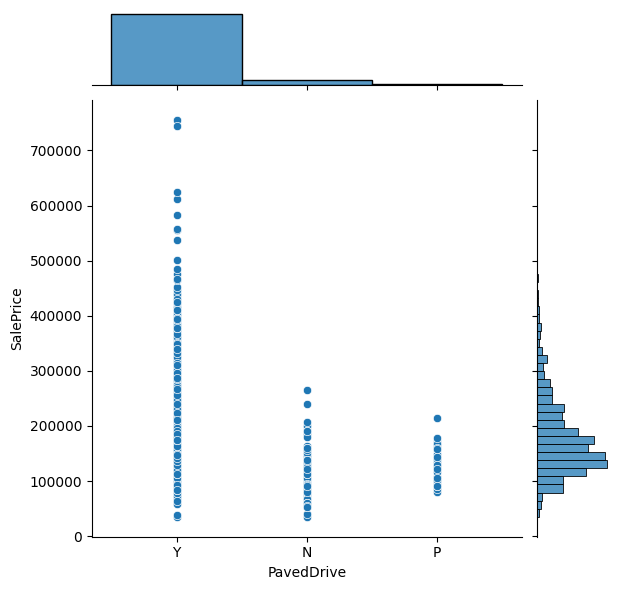

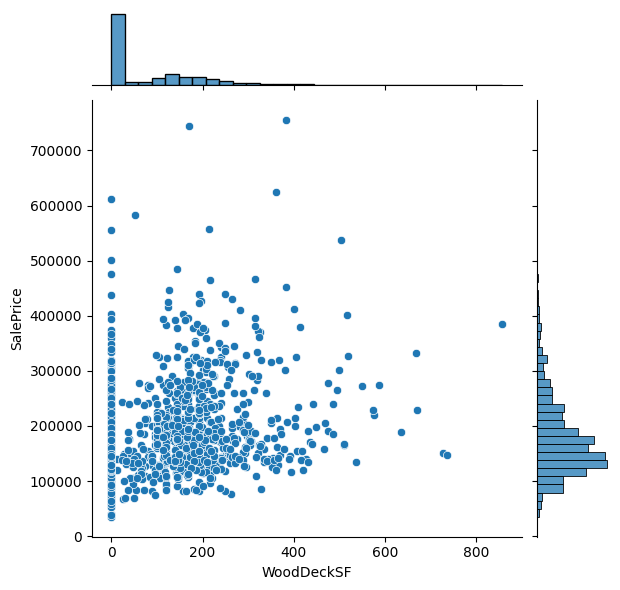

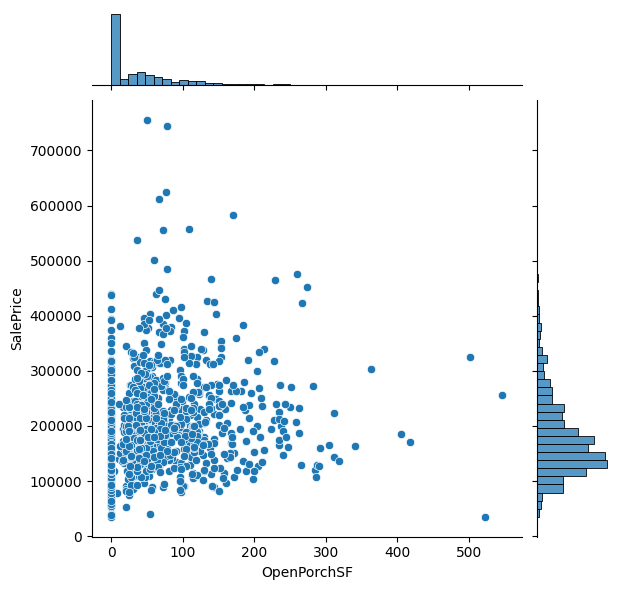

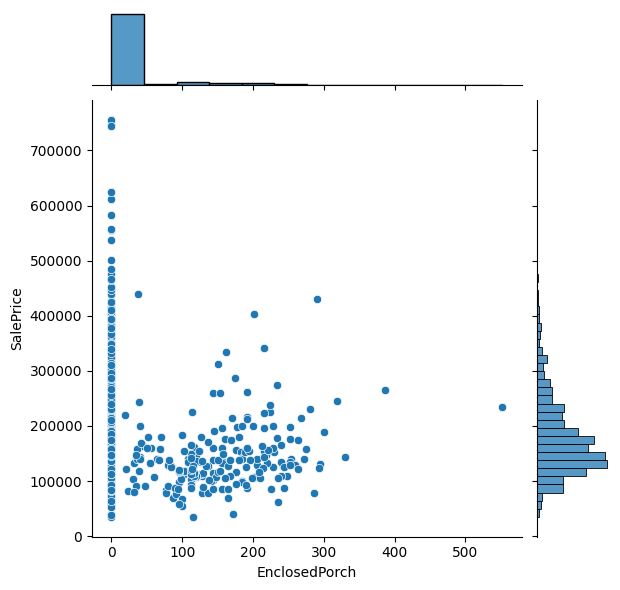

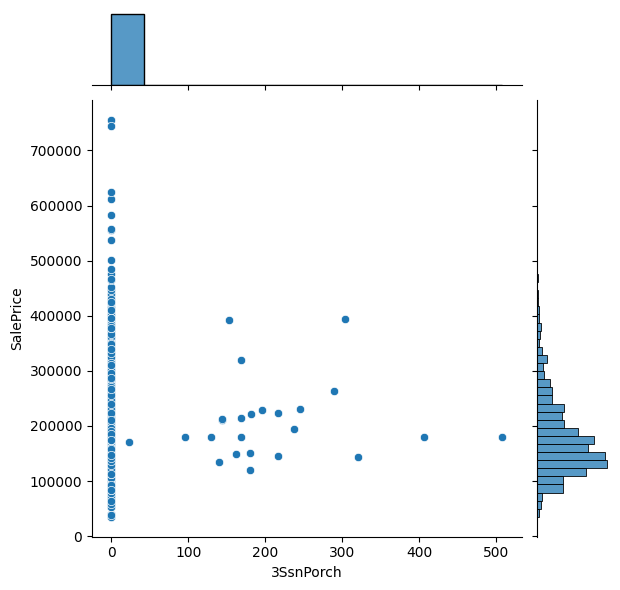

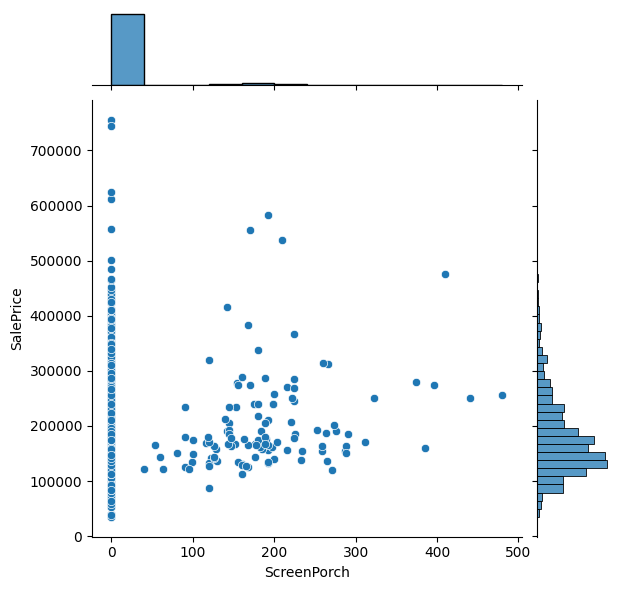

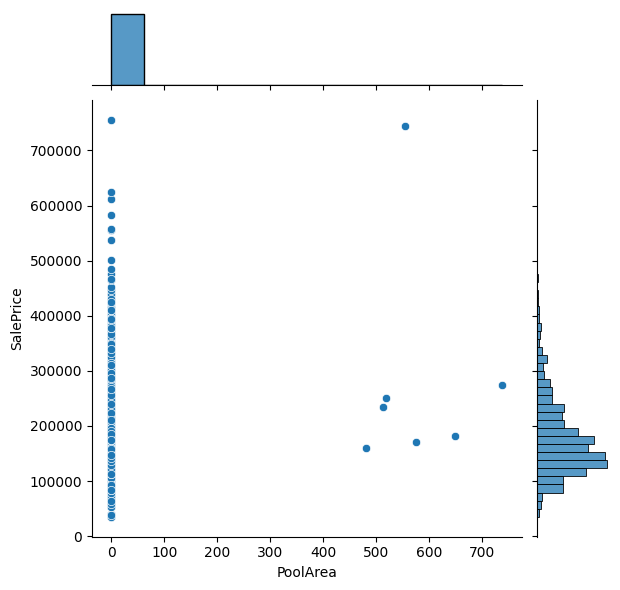

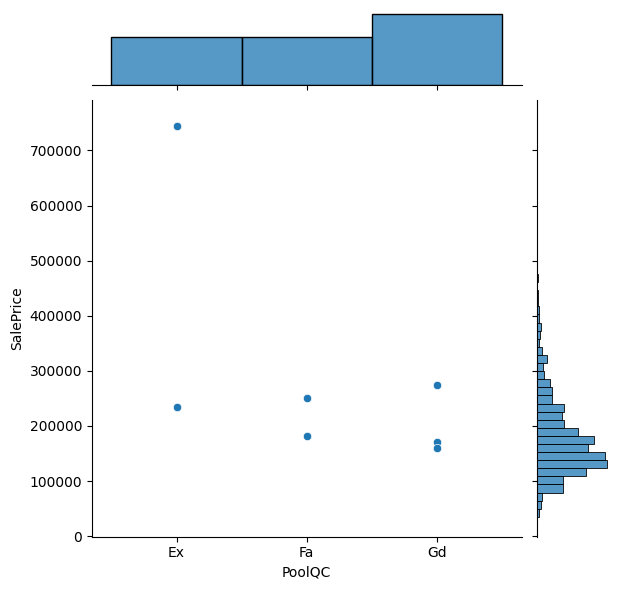

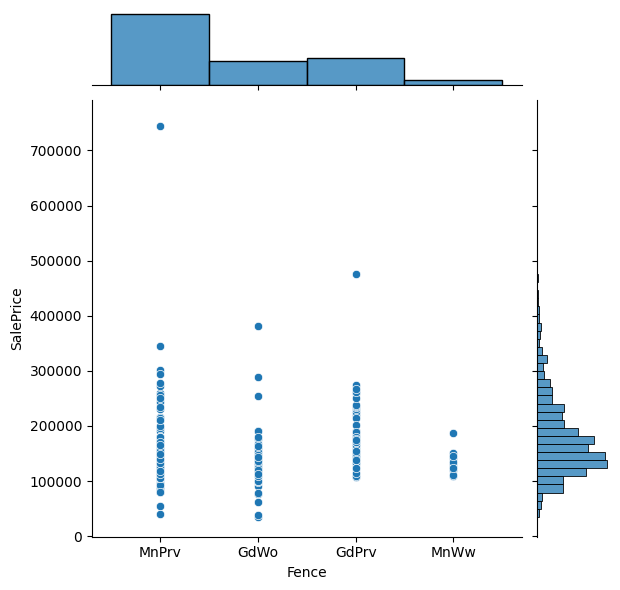

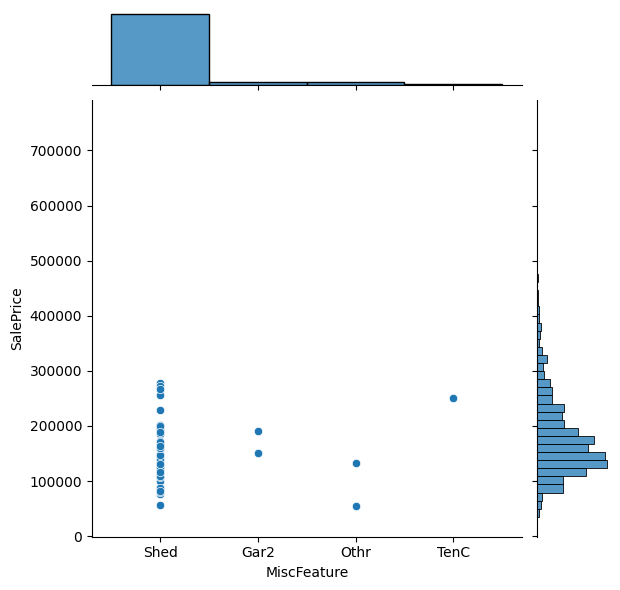

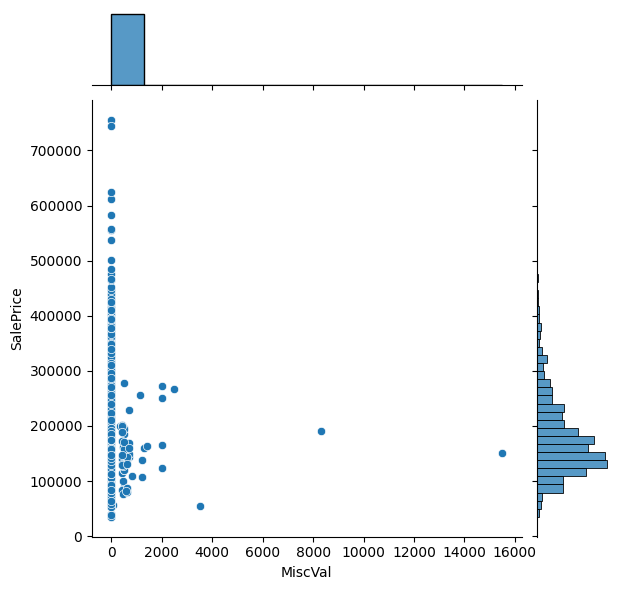

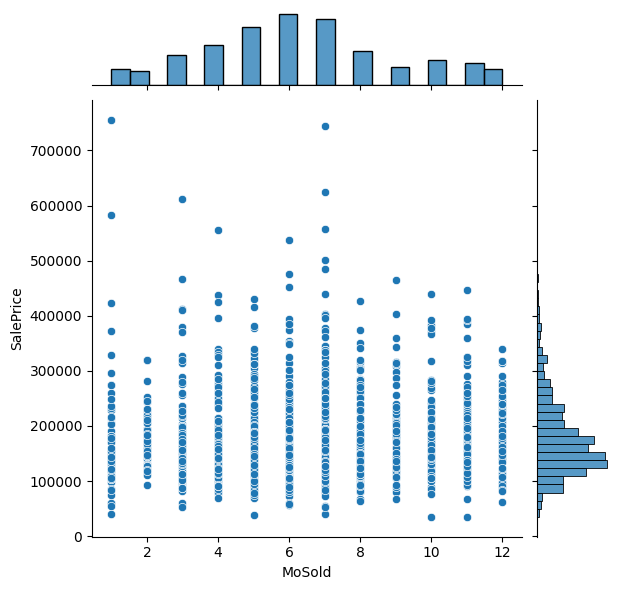

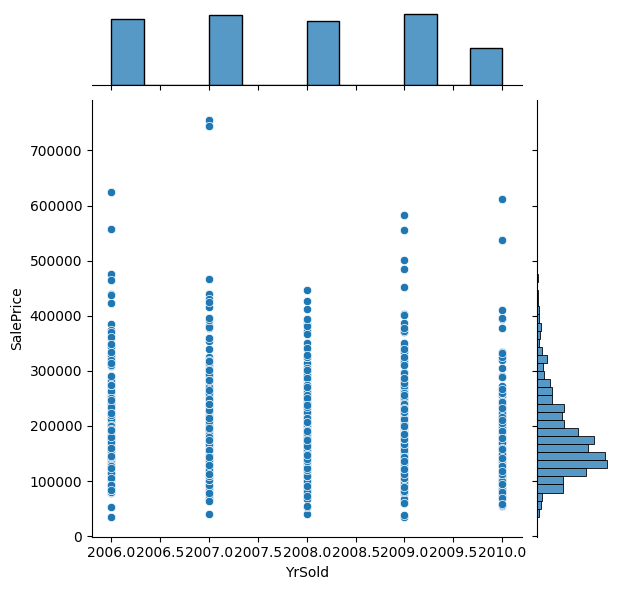

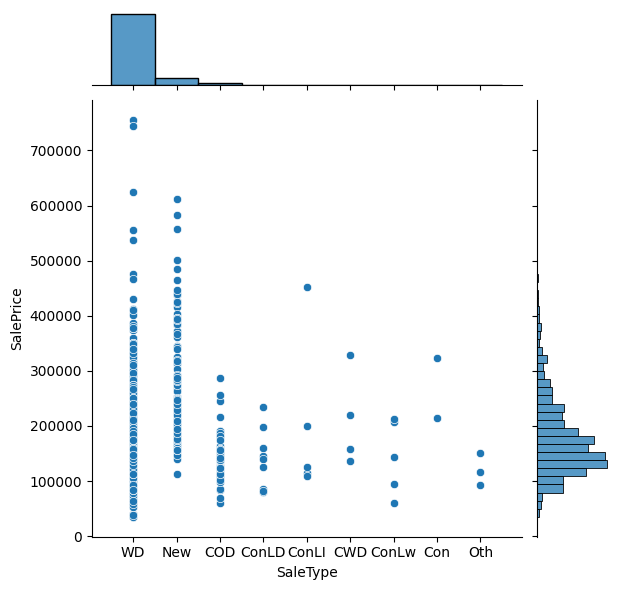

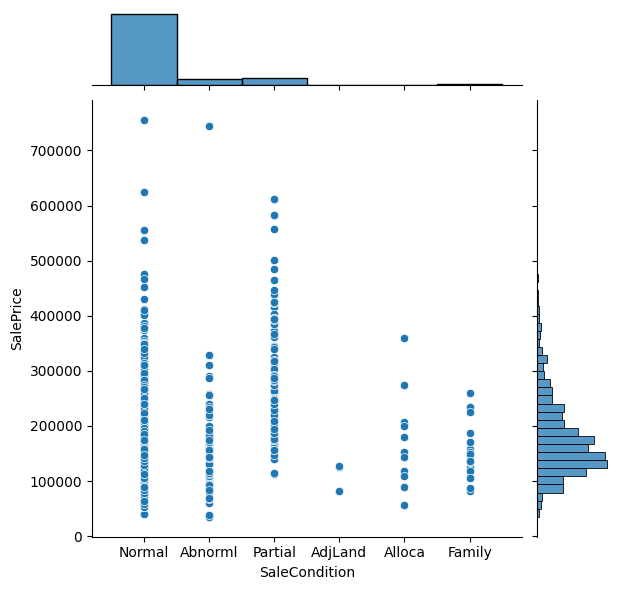

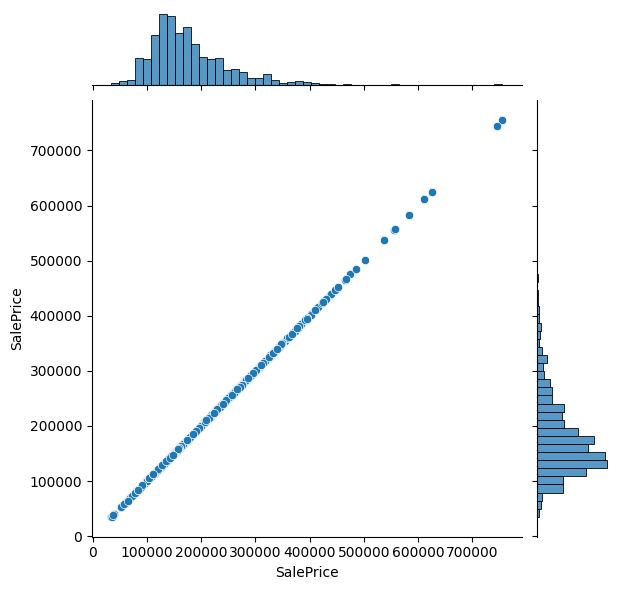

In [3]:
#資料觀察
df.describe().T
sns.displot(df['SalePrice'])
for i in df.keys():
  sns.jointplot(x=df[i],y=df['SalePrice'])

從數據觀察中可發現有些資料由於缺失太多所以沒有明顯趨勢，房屋價格幾乎都落在20萬上下也導致數據要觀察有點困難，我從中挑取了些能稍微看到趨勢的散佈圖:
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- GarageArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- GarageCars  
我決定以這些作為訓練資料

In [ ]:
#遺失值觀察
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

我選擇的資料都沒有數據缺失的問題，所以可以先開始刪去那些不需要的資料，整理出實際使用的資料。

In [4]:
#數據整理
X=df.loc[:,['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageCars']]
y=df['SalePrice']
#測試資料切割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=54)
X_train

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageCars
873,832,1036,0,1268,288,5,7,1949,1950,1
549,912,912,1182,2094,615,7,5,2003,2004,2
791,1029,1062,0,1062,539,6,5,1976,1976,2
1342,1284,1284,885,2169,647,8,5,2002,2002,2
633,1056,1056,0,1056,260,5,7,1954,2005,1
...,...,...,...,...,...,...,...,...,...,...
1344,728,728,728,1456,440,7,5,2006,2006,2
1047,990,990,0,990,672,5,5,1994,1995,2
898,2330,2364,0,2364,820,9,5,2009,2010,3
1349,684,938,1215,2358,0,8,5,1872,1987,0


In [6]:
#訓練模型
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
predictions=reg.predict(X_test)
predictions

from sklearn.metrics import r2_score
r2_score(y_test,predictions)


0.7284887963787927

試著看看能不能讓準確度再上升些

In [8]:
from sklearn.ensemble import RandomForestRegressor
forestreg=RandomForestRegressor()
forestreg.fit(X_train,y_train)
predictions=forestreg.predict(X_test)
predictions

from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.8487363329453803

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
gradientboostingreg=GradientBoostingRegressor()
gradientboostingreg.fit(X_train,y_train)
predictions=gradientboostingreg.predict(X_test)
predictions
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.8750704285496713

使用梯度提升回歸，作為預測模型

In [12]:
#匯出模型
import joblib
joblib.dump(gradientboostingreg,'HousePrice.pkl',compress=3)

['HousePrice.pkl']